# Natural Language Understanding: Text Classification & Named Entity Recognition

This notebook demonstrates comprehensive NLU tasks using Hugging Face Transformers and spaCy for text classification and entity recognition.

In [1]:
# Install required packages
!pip install transformers spacy torch scikit-learn matplotlib seaborn
!python -m spacy download en_core_web_sm

  Using cached scikit_learn-1.7.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl.metadata (41 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingha

In [2]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')

from transformers import pipeline
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Text Classification

Text classification is the task of assigning predefined categories or labels to text documents. We'll explore different types of classification tasks including sentiment analysis, topic classification, and emotion detection.

### 1. Sentiment Analysis

Sentiment analysis determines the emotional tone of text (positive, negative, neutral).

In [3]:
# Initialize sentiment analysis pipeline
sentiment_classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Test examples
texts = [
    "The movie was absolutely fantastic! I loved every minute of it.",
    "This product is terrible and completely useless.",
    "The weather is okay today, nothing special.",
    "I'm so excited about the upcoming vacation!",
    "The service at the restaurant was disappointing."
]

print("🎭 Sentiment Analysis Results")
print("=" * 50)

for i, text in enumerate(texts, 1):
    result = sentiment_classifier(text)[0]
    emoji = "😊" if result['label'] == 'POSITIVE' else "😔"
    
    print(f"{i}. Text: {text}")
    print(f"   {emoji} Sentiment: {result['label']} (confidence: {result['score']:.4f})")
    print()

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


🎭 Sentiment Analysis Results
1. Text: The movie was absolutely fantastic! I loved every minute of it.
   😊 Sentiment: POSITIVE (confidence: 0.9999)

2. Text: This product is terrible and completely useless.
   😔 Sentiment: NEGATIVE (confidence: 0.9998)

3. Text: The weather is okay today, nothing special.
   😔 Sentiment: NEGATIVE (confidence: 0.9645)

4. Text: I'm so excited about the upcoming vacation!
   😊 Sentiment: POSITIVE (confidence: 0.9998)

5. Text: The service at the restaurant was disappointing.
   😔 Sentiment: NEGATIVE (confidence: 0.9997)

1. Text: The movie was absolutely fantastic! I loved every minute of it.
   😊 Sentiment: POSITIVE (confidence: 0.9999)

2. Text: This product is terrible and completely useless.
   😔 Sentiment: NEGATIVE (confidence: 0.9998)

3. Text: The weather is okay today, nothing special.
   😔 Sentiment: NEGATIVE (confidence: 0.9645)

4. Text: I'm so excited about the upcoming vacation!
   😊 Sentiment: POSITIVE (confidence: 0.9998)

5. Text: The ser

### 2. Emotion Detection

Emotion detection goes beyond sentiment to identify specific emotions like joy, anger, fear, sadness, etc.

In [4]:
# Initialize emotion detection pipeline
emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base')

# Test examples for emotion detection
emotion_texts = [
    "I can't believe I won the lottery! This is amazing!",
    "I'm so frustrated with this constant technical issues.",
    "The thunderstorm outside is making me feel anxious.",
    "I feel so lonely since moving to this new city.",
    "That horror movie really scared me last night.",
    "I'm disgusted by the way they treated the animals."
]

print("😊 Emotion Detection Results")
print("=" * 50)

emotion_emoji_map = {
    'joy': '😄', 'anger': '😠', 'fear': '😨', 
    'sadness': '😢', 'surprise': '😲', 'disgust': '🤢'
}

for i, text in enumerate(emotion_texts, 1):
    result = emotion_classifier(text)[0]
    emotion = result['label'].lower()
    emoji = emotion_emoji_map.get(emotion, '😐')
    
    print(f"{i}. Text: {text}")
    print(f"   {emoji} Emotion: {result['label']} (confidence: {result['score']:.4f})")
    print()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Device set to use cpu


😊 Emotion Detection Results
1. Text: I can't believe I won the lottery! This is amazing!
   😲 Emotion: surprise (confidence: 0.9379)

2. Text: I'm so frustrated with this constant technical issues.
   😠 Emotion: anger (confidence: 0.9473)

3. Text: The thunderstorm outside is making me feel anxious.
   😨 Emotion: fear (confidence: 0.9893)

4. Text: I feel so lonely since moving to this new city.
   😢 Emotion: sadness (confidence: 0.9845)

5. Text: That horror movie really scared me last night.
   😨 Emotion: fear (confidence: 0.9889)

2. Text: I'm so frustrated with this constant technical issues.
   😠 Emotion: anger (confidence: 0.9473)

3. Text: The thunderstorm outside is making me feel anxious.
   😨 Emotion: fear (confidence: 0.9893)

4. Text: I feel so lonely since moving to this new city.
   😢 Emotion: sadness (confidence: 0.9845)

5. Text: That horror movie really scared me last night.
   😨 Emotion: fear (confidence: 0.9889)

6. Text: I'm disgusted by the way they treated the ani

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

## Named Entity Recognition (NER)

Named Entity Recognition identifies and classifies named entities in text into predefined categories such as persons, organizations, locations, dates, etc.

### 1. spaCy NER

spaCy provides robust named entity recognition with pre-trained models.

In [5]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Test examples for NER
ner_texts = [
    "Apple Inc. is looking at buying U.K. startup for $1 billion on December 15, 2023.",
    "Elon Musk founded SpaceX in 2002 and later became CEO of Tesla in Palo Alto, California.",
    "The meeting with Microsoft will be held at 3 PM EST in New York City next Tuesday.",
    "Dr. Jane Smith from Harvard University published a research paper in Nature journal.",
    "Amazon announced a new AWS data center in Frankfurt, Germany, investing €2.8 billion."
]

print("🏷️  spaCy Named Entity Recognition")
print("=" * 60)

# Entity type descriptions
entity_descriptions = {
    'PERSON': '👤 Person names',
    'ORG': '🏢 Organizations, companies',
    'GPE': '🌍 Countries, cities, states',
    'MONEY': '💰 Monetary values',
    'DATE': '📅 Dates and times',
    'TIME': '⏰ Times',
    'PRODUCT': '📦 Products, vehicles',
    'EVENT': '🎉 Events',
    'FAC': '🏛️  Buildings, facilities',
    'LOC': '📍 Locations',
    'NORP': '🏛️  Nationalities, religious groups'
}

for i, text in enumerate(ner_texts, 1):
    doc = nlp(text)
    print(f"{i}. Text: {text}")
    print("   Entities found:")
    
    if doc.ents:
        for ent in doc.ents:
            desc = entity_descriptions.get(ent.label_, f"📌 {ent.label_}")
            print(f"      • {ent.text} → {desc}")
    else:
        print("      • No entities found")
    print()

🏷️  spaCy Named Entity Recognition
1. Text: Apple Inc. is looking at buying U.K. startup for $1 billion on December 15, 2023.
   Entities found:
      • Apple Inc. → 🏢 Organizations, companies
      • U.K. → 🌍 Countries, cities, states
      • $1 billion → 💰 Monetary values
      • December 15, 2023 → 📅 Dates and times

2. Text: Elon Musk founded SpaceX in 2002 and later became CEO of Tesla in Palo Alto, California.
   Entities found:
      • Elon Musk → 👤 Person names
      • 2002 → 📅 Dates and times
      • Tesla → 🏢 Organizations, companies
      • Palo Alto → 🌍 Countries, cities, states
      • California → 🌍 Countries, cities, states

3. Text: The meeting with Microsoft will be held at 3 PM EST in New York City next Tuesday.
   Entities found:
      • Microsoft → 🏢 Organizations, companies
      • 3 PM EST → ⏰ Times
      • New York City → 🌍 Countries, cities, states
      • next Tuesday → 📅 Dates and times

4. Text: Dr. Jane Smith from Harvard University published a research pape

### 2. Transformers NER

Hugging Face Transformers also provides powerful NER models with different capabilities.

In [6]:
# Initialize Transformers NER pipeline
ner_pipeline = pipeline('ner', model='dbmdz/bert-large-cased-finetuned-conll03-english', grouped_entities=True)

# Test text for comparison
test_text = "Apple Inc. is looking at buying U.K. startup for $1 billion on December 15, 2023."

print("🤖 Transformers NER Results")
print("=" * 50)
print(f"Text: {test_text}")
print("\nEntities found:")

entities = ner_pipeline(test_text)
for entity in entities:
    confidence_bar = "█" * int(entity['score'] * 10)
    print(f"  • {entity['word']}: {entity['entity_group']} (confidence: {entity['score']:.4f}) {confidence_bar}")

# Compare with spaCy results
print("\n🔄 Comparison with spaCy:")
print("=" * 30)
doc = nlp(test_text)
print("spaCy entities:")
for ent in doc.ents:
    print(f"  • {ent.text}: {ent.label_}")

print("\nTransformers entities:")
for entity in entities:
    print(f"  • {entity['word']}: {entity['entity_group']}")

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


🤖 Transformers NER Results
Text: Apple Inc. is looking at buying U.K. startup for $1 billion on December 15, 2023.

Entities found:
  • Apple Inc: ORG (confidence: 0.9995) █████████
  • U: LOC (confidence: 0.9997) █████████
  • K: LOC (confidence: 0.9981) █████████

🔄 Comparison with spaCy:
spaCy entities:
  • Apple Inc.: ORG
  • U.K.: GPE
  • $1 billion: MONEY
  • December 15, 2023: DATE

Transformers entities:
  • Apple Inc: ORG
  • U: LOC
  • K: LOC
  • Apple Inc: ORG (confidence: 0.9995) █████████
  • U: LOC (confidence: 0.9997) █████████
  • K: LOC (confidence: 0.9981) █████████

🔄 Comparison with spaCy:
spaCy entities:
  • Apple Inc.: ORG
  • U.K.: GPE
  • $1 billion: MONEY
  • December 15, 2023: DATE

Transformers entities:
  • Apple Inc: ORG
  • U: LOC
  • K: LOC


## Data Visualization

Let's visualize the results of our NLU analysis to better understand the patterns.

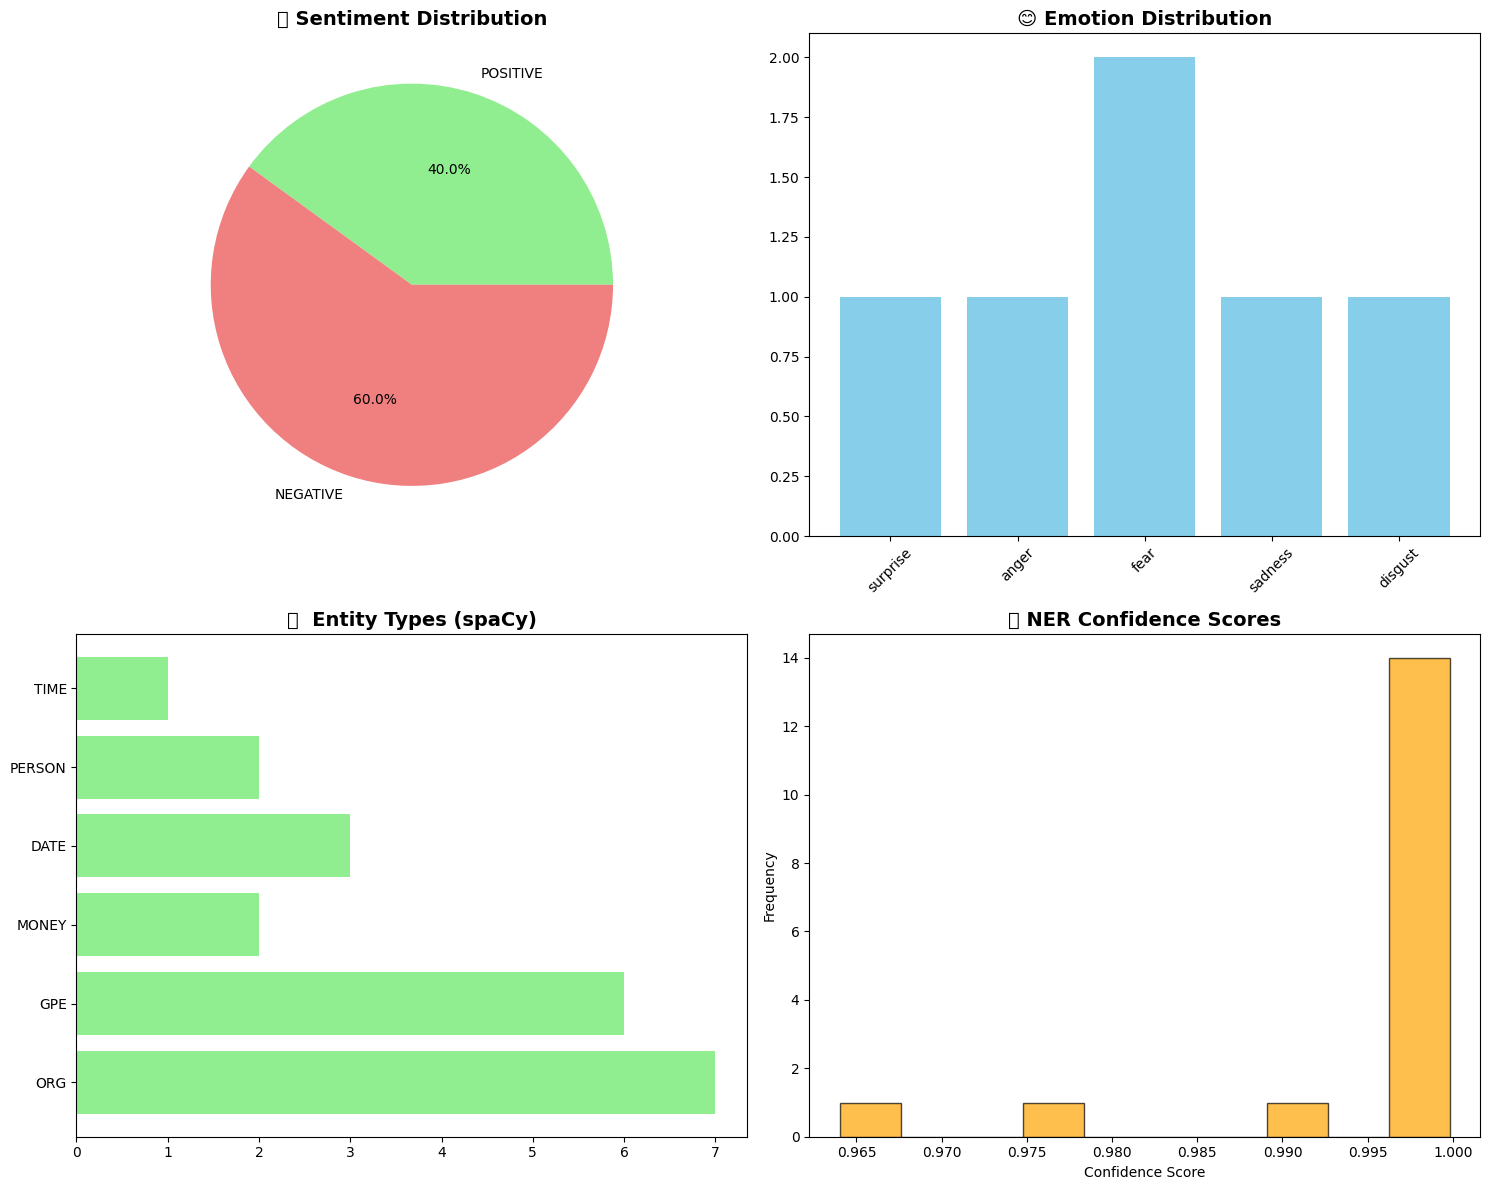

📈 Summary Statistics
• Total texts analyzed: 16
• Unique entity types found: 6
• Most common entity type: ORG
• Average NER confidence: 0.9949
• Confidence score range: 0.9640 - 0.9998
• Most common sentiment: NEGATIVE
• Most common emotion: fear


In [7]:
# Analyze sentiment distribution
sentiment_results = []
for text in texts:
    result = sentiment_classifier(text)[0]
    sentiment_results.append(result['label'])

# Count sentiment distribution
sentiment_counts = Counter(sentiment_results)

# Create visualizations with robust error handling
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sentiment Distribution with error handling
if sentiment_results and sentiment_counts and len(sentiment_counts) > 0:
    ax1.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', 
            colors=['lightgreen', 'lightcoral'])
    ax1.set_title('📊 Sentiment Distribution', fontsize=14, fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'No sentiment data available', 
             transform=ax1.transAxes, ha='center', va='center',
             fontsize=12, style='italic')
    ax1.set_title('📊 Sentiment Distribution', fontsize=14, fontweight='bold')

# 2. Emotion Distribution with error handling
emotion_results = []
for text in emotion_texts:
    result = emotion_classifier(text)[0]
    emotion_results.append(result['label'])

emotion_counts = Counter(emotion_results)
if emotion_results and emotion_counts and len(emotion_counts) > 0:
    ax2.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
    ax2.tick_params(axis='x', rotation=45)
    ax2.set_title('😊 Emotion Distribution', fontsize=14, fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'No emotion data available', 
             transform=ax2.transAxes, ha='center', va='center',
             fontsize=12, style='italic')
    ax2.set_title('😊 Emotion Distribution', fontsize=14, fontweight='bold')

# 3. Entity Type Distribution (spaCy) with error handling
all_entities = []
for text in ner_texts:
    doc = nlp(text)
    for ent in doc.ents:
        all_entities.append(ent.label_)

entity_counts = Counter(all_entities)
if all_entities and entity_counts and len(entity_counts) > 0:
    ax3.barh(list(entity_counts.keys()), list(entity_counts.values()), color='lightgreen')
    ax3.set_title('🏷️  Entity Types (spaCy)', fontsize=14, fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'No entities detected', 
             transform=ax3.transAxes, ha='center', va='center',
             fontsize=12, style='italic')
    ax3.set_title('🏷️  Entity Types (spaCy)', fontsize=14, fontweight='bold')

# 4. Confidence Scores Distribution with error handling
confidence_scores = []
try:
    for text in ner_texts:
        entities = ner_pipeline(text)
        for entity in entities:
            if 'score' in entity and entity['score'] is not None:
                confidence_scores.append(entity['score'])
except Exception as e:
    print(f"Warning: Error processing confidence scores: {e}")

if confidence_scores and len(confidence_scores) > 0:
    ax4.hist(confidence_scores, bins=min(10, len(confidence_scores)), 
             color='orange', alpha=0.7, edgecolor='black')
    ax4.set_xlabel('Confidence Score')
    ax4.set_ylabel('Frequency')
    ax4.set_title('📈 NER Confidence Scores', fontsize=14, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'No confidence scores available', 
             transform=ax4.transAxes, ha='center', va='center',
             fontsize=12, style='italic')
    ax4.set_title('📈 NER Confidence Scores', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics with comprehensive error handling
print("📈 Summary Statistics")
print("=" * 40)

# Safe total count calculation
total_texts = 0
try:
    total_texts = len(texts) + len(emotion_texts) + len(ner_texts)
except (NameError, TypeError):
    total_texts = 0

print(f"• Total texts analyzed: {total_texts}")

# Handle empty entity counts with safe max() operation
if entity_counts and len(entity_counts) > 0:
    try:
        most_common_entity = max(entity_counts, key=entity_counts.get)
        print(f"• Unique entity types found: {len(entity_counts)}")
        print(f"• Most common entity type: {most_common_entity}")
    except (ValueError, KeyError) as e:
        print(f"• Unique entity types found: {len(entity_counts) if entity_counts else 0}")
        print("• Most common entity type: Unable to determine")
else:
    print("• Unique entity types found: 0")
    print("• Most common entity type: None")

# Handle empty confidence scores with division by zero protection
if confidence_scores and len(confidence_scores) > 0:
    try:
        avg_confidence = sum(confidence_scores) / len(confidence_scores)
        print(f"• Average NER confidence: {avg_confidence:.4f}")
        print(f"• Confidence score range: {min(confidence_scores):.4f} - {max(confidence_scores):.4f}")
    except (ZeroDivisionError, ValueError) as e:
        print("• Average NER confidence: Unable to calculate")
else:
    print("• Average NER confidence: N/A (no confidence scores available)")

# Handle empty sentiment and emotion counts with safe max() operation
if sentiment_counts and len(sentiment_counts) > 0:
    try:
        most_common_sentiment = max(sentiment_counts, key=sentiment_counts.get)
        print(f"• Most common sentiment: {most_common_sentiment}")
    except (ValueError, KeyError):
        print("• Most common sentiment: Unable to determine")
else:
    print("• Most common sentiment: N/A")

if emotion_counts and len(emotion_counts) > 0:
    try:
        most_common_emotion = max(emotion_counts, key=emotion_counts.get)
        print(f"• Most common emotion: {most_common_emotion}")
    except (ValueError, KeyError):
        print("• Most common emotion: Unable to determine")
else:
    print("• Most common emotion: N/A")

## Comprehensive NLU Analysis

Let's create a unified function that performs all NLU tasks on any given text.

In [8]:
def comprehensive_nlu_analysis(text):
    """
    Perform comprehensive NLU analysis including sentiment, emotion, and entity recognition
    with robust error handling for all components
    """
    if not text or not isinstance(text, str) or len(text.strip()) == 0:
        print("⚠️  Warning: Empty or invalid text provided")
        return None
    
    print("🔍 Comprehensive NLU Analysis")
    print("=" * 60)
    print(f"📝 Input Text: {text}")
    print()
    
    results = {}
    
    # Sentiment Analysis with error handling
    try:
        sentiment_result = sentiment_classifier(text)[0]
        sentiment_emoji = "😊" if sentiment_result['label'] == 'POSITIVE' else "😔"
        print(f"🎭 Sentiment: {sentiment_emoji} {sentiment_result['label']} (confidence: {sentiment_result['score']:.4f})")
        results['sentiment'] = sentiment_result
    except Exception as e:
        print(f"🎭 Sentiment: ❌ Error during sentiment analysis: {e}")
        results['sentiment'] = None
    
    # Emotion Detection with error handling
    try:
        emotion_result = emotion_classifier(text)[0]
        emotion = emotion_result['label'].lower()
        emotion_emoji = emotion_emoji_map.get(emotion, '😐')
        print(f"😊 Emotion: {emotion_emoji} {emotion_result['label']} (confidence: {emotion_result['score']:.4f})")
        results['emotion'] = emotion_result
    except Exception as e:
        print(f"😊 Emotion: ❌ Error during emotion detection: {e}")
        results['emotion'] = None
    
    # spaCy NER with error handling
    try:
        doc = nlp(text)
        print("🏷️  Entities (spaCy):")
        if doc.ents and len(doc.ents) > 0:
            spacy_entities = []
            for ent in doc.ents:
                desc = entity_descriptions.get(ent.label_, f"📌 {ent.label_}")
                print(f"   • {ent.text} → {desc}")
                spacy_entities.append((ent.text, ent.label_))
            results['spacy_entities'] = spacy_entities
        else:
            print("   • No entities found")
            results['spacy_entities'] = []
    except Exception as e:
        print(f"🏷️  Entities (spaCy): ❌ Error during spaCy NER: {e}")
        results['spacy_entities'] = []
    
    # Transformers NER with error handling
    try:
        entities = ner_pipeline(text)
        print("🤖 Entities (Transformers):")
        if entities and len(entities) > 0:
            transformer_entities = []
            for entity in entities:
                if all(key in entity for key in ['word', 'entity_group', 'score']):
                    print(f"   • {entity['word']} → {entity['entity_group']} (confidence: {entity['score']:.4f})")
                    transformer_entities.append((entity['word'], entity['entity_group'], entity['score']))
                else:
                    print(f"   • {entity.get('word', 'Unknown')} → {entity.get('entity_group', 'Unknown')} (incomplete data)")
            results['transformer_entities'] = transformer_entities
        else:
            print("   • No entities found")
            results['transformer_entities'] = []
    except Exception as e:
        print(f"🤖 Entities (Transformers): ❌ Error during Transformers NER: {e}")
        results['transformer_entities'] = []
    
    print("\n" + "="*60 + "\n")
    
    return results

# Test the comprehensive function with enhanced error handling
test_samples = [
    "I'm thrilled to announce that our company Apple Inc. will be launching a new product in San Francisco next month!",
    "The disappointing performance by Tesla in the stock market yesterday really worried investors in New York.",
    "Dr. Sarah Johnson from MIT published groundbreaking research about artificial intelligence in Nature journal last week."
]

print("🧪 Testing Comprehensive Analysis Function")
print("=" * 60)

for i, sample in enumerate(test_samples, 1):
    print(f"\n📝 Test Sample {i}:")
    result = comprehensive_nlu_analysis(sample)
    
    # Validate results
    if result is not None:
        print("✅ Analysis completed successfully")
        
        # Count successful components
        successful_components = sum(1 for key, value in result.items() if value is not None and value != [])
        total_components = len(result)
        print(f"📊 Components processed: {successful_components}/{total_components}")
    else:
        print("❌ Analysis failed")
    
    print("-" * 60)

🧪 Testing Comprehensive Analysis Function

📝 Test Sample 1:
🔍 Comprehensive NLU Analysis
📝 Input Text: I'm thrilled to announce that our company Apple Inc. will be launching a new product in San Francisco next month!

🎭 Sentiment: 😊 POSITIVE (confidence: 0.9998)
😊 Emotion: 😄 joy (confidence: 0.9502)
🏷️  Entities (spaCy):
   • Apple Inc. → 🏢 Organizations, companies
   • San Francisco → 🌍 Countries, cities, states
   • next month → 📅 Dates and times
🎭 Sentiment: 😊 POSITIVE (confidence: 0.9998)
😊 Emotion: 😄 joy (confidence: 0.9502)
🏷️  Entities (spaCy):
   • Apple Inc. → 🏢 Organizations, companies
   • San Francisco → 🌍 Countries, cities, states
   • next month → 📅 Dates and times
🤖 Entities (Transformers):
   • Apple Inc → ORG (confidence: 0.9996)
   • San Francisco → LOC (confidence: 0.9996)


✅ Analysis completed successfully
📊 Components processed: 4/4
------------------------------------------------------------

📝 Test Sample 2:
🔍 Comprehensive NLU Analysis
📝 Input Text: The disappo

## Interactive Experimentation

Try your own text examples below! Modify the `user_text` variable to experiment with different NLU scenarios.

In [9]:
# 🧪 Experiment with your own text!
# Modify this variable to test different texts
user_text = "I absolutely love the new iPhone released by Apple in Cupertino! Tim Cook did an amazing job presenting it."

# Validate input text
if not user_text or not isinstance(user_text, str) or len(user_text.strip()) == 0:
    print("⚠️  Warning: Please provide a valid text string for analysis")
    user_text = "Default sample text for analysis."

print("🧪 Your Custom Analysis")
print("=" * 60)

# Run comprehensive analysis with error handling
try:
    result = comprehensive_nlu_analysis(user_text)
    
    if result is not None:
        # Additional analysis: Word count and text statistics with error handling
        print("📊 Text Statistics:")
        
        try:
            words = user_text.split()
            word_count = len(words) if words else 0
            char_count = len(user_text) if user_text else 0
            
            # Safe sentence counting
            sentences = [s for s in user_text.split('.') if s.strip()] if user_text else []
            sentence_count = len(sentences)
            
            print(f"   • Word count: {word_count}")
            print(f"   • Character count: {char_count}")
            print(f"   • Sentence count: {sentence_count}")
            
            # Entity density calculations with error handling
            spacy_entity_count = len(result.get('spacy_entities', []))
            transformer_entity_count = len(result.get('transformer_entities', []))
            
            if word_count > 0:
                spacy_density = (spacy_entity_count / word_count) * 100
                transformer_density = (transformer_entity_count / word_count) * 100
                print(f"   • Entity density (spaCy): {spacy_density:.2f}%")
                print(f"   • Entity density (Transformers): {transformer_density:.2f}%")
            else:
                print("   • Entity density: Cannot calculate (no words found)")
                
            # Additional insights
            if spacy_entity_count > 0 or transformer_entity_count > 0:
                print(f"   • Total unique entities detected: {spacy_entity_count + transformer_entity_count}")
            else:
                print("   • Total unique entities detected: 0")
                
        except Exception as e:
            print(f"   ❌ Error calculating text statistics: {e}")
            
    else:
        print("❌ Analysis failed. Please check your input text.")
        
except Exception as e:
    print(f"❌ Unexpected error during analysis: {e}")

print("\n💡 Try modifying the 'user_text' variable above with your own examples!")
print("💡 Tips for better analysis:")
print("   • Use text with names, places, or organizations for entity recognition")
print("   • Include emotional words for better sentiment/emotion detection")
print("   • Try different text lengths and styles")
print("   • Test with multilingual content to see model limitations")

🧪 Your Custom Analysis
🔍 Comprehensive NLU Analysis
📝 Input Text: I absolutely love the new iPhone released by Apple in Cupertino! Tim Cook did an amazing job presenting it.

🎭 Sentiment: 😊 POSITIVE (confidence: 0.9998)
😊 Emotion: 😄 joy (confidence: 0.8562)
🏷️  Entities (spaCy):
   • iPhone → 🏢 Organizations, companies
   • Apple → 🏢 Organizations, companies
   • Cupertino → 🌍 Countries, cities, states
   • Tim Cook → 👤 Person names
😊 Emotion: 😄 joy (confidence: 0.8562)
🏷️  Entities (spaCy):
   • iPhone → 🏢 Organizations, companies
   • Apple → 🏢 Organizations, companies
   • Cupertino → 🌍 Countries, cities, states
   • Tim Cook → 👤 Person names
🤖 Entities (Transformers):
   • iPhone → MISC (confidence: 0.9937)
   • Apple → ORG (confidence: 0.9951)
   • Cupertino → LOC (confidence: 0.9650)
   • Tim Cook → PER (confidence: 0.9996)


📊 Text Statistics:
   • Word count: 19
   • Character count: 107
   • Sentence count: 1
   • Entity density (spaCy): 21.05%
   • Entity density (Transformer

🚀 Demonstrating Batch Analysis with Safe Visualizations
🔍 Analyzing 5 texts...
🔍 Comprehensive NLU Analysis
📝 Input Text: I love this new technology!

🎭 Sentiment: 😊 POSITIVE (confidence: 0.9999)
😊 Emotion: 😄 joy (confidence: 0.9782)
🏷️  Entities (spaCy):
   • No entities found
🤖 Entities (Transformers):
   • No entities found


🔍 Comprehensive NLU Analysis
📝 Input Text: This is frustrating and disappointing.

🎭 Sentiment: 😔 NEGATIVE (confidence: 0.9998)
😊 Emotion: 😢 sadness (confidence: 0.7624)
🏷️  Entities (spaCy):
   • No entities found
🤖 Entities (Transformers):
   • No entities found


🔍 Comprehensive NLU Analysis
📝 Input Text: This is frustrating and disappointing.

🎭 Sentiment: 😔 NEGATIVE (confidence: 0.9998)
😊 Emotion: 😢 sadness (confidence: 0.7624)
🏷️  Entities (spaCy):
   • No entities found
🤖 Entities (Transformers):
   • No entities found


🔍 Comprehensive NLU Analysis
📝 Input Text: Apple Inc. announced a new product.

🎭 Sentiment: 😊 POSITIVE (confidence: 0.9952)
😊 Emotion:

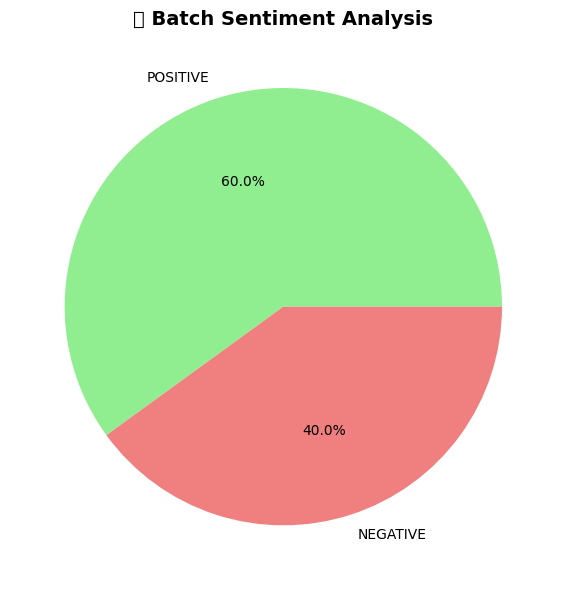

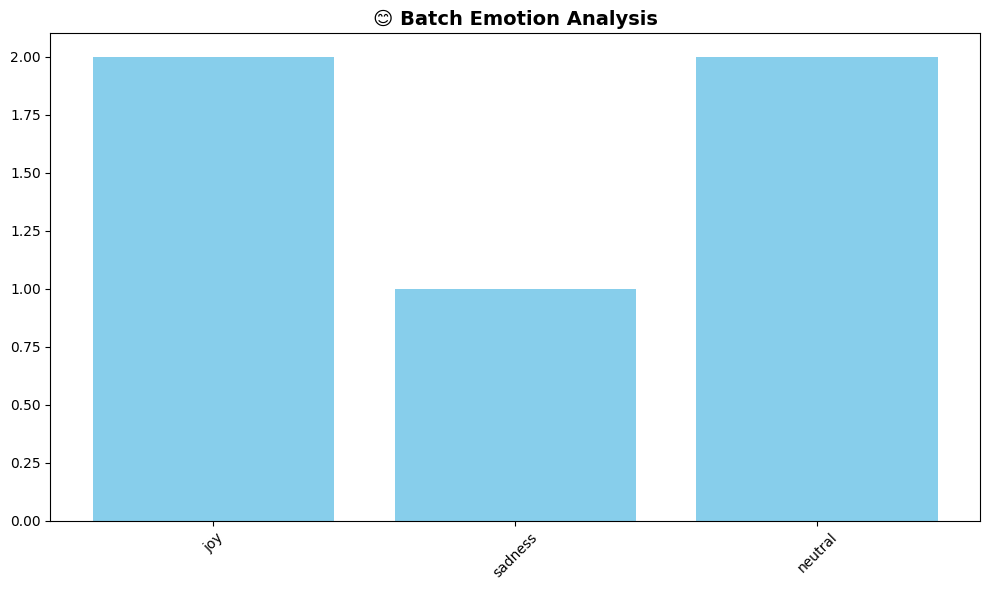

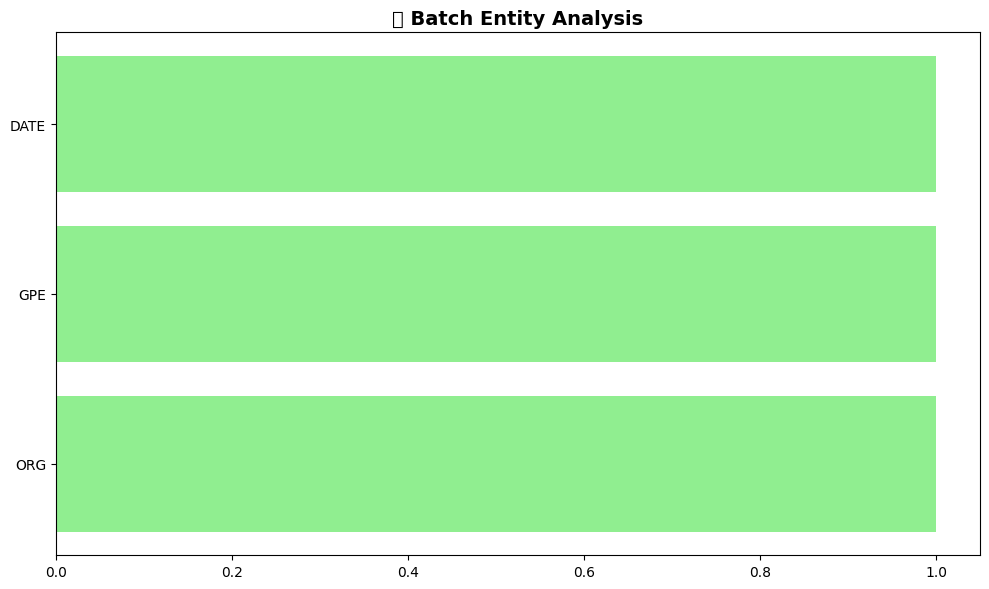

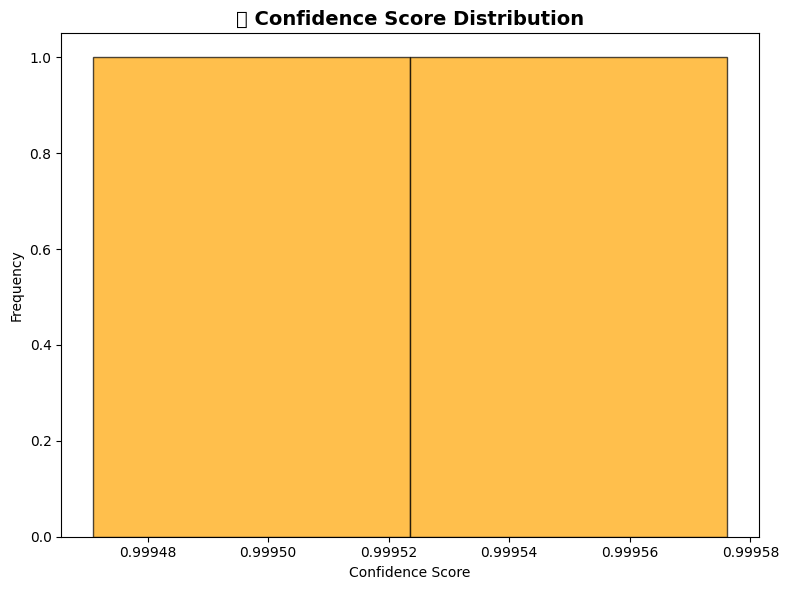


📈 Batch Analysis Summary
• Sentiments: 5 items
• Emotions: 5 items
• Entities: 3 items
• Confidence_Scores: 2 items


In [10]:
## Advanced Visualization Utilities

def create_safe_visualization(data, plot_type, title, **kwargs):
    """
    Create visualizations with comprehensive error handling
    
    Args:
        data: Data to visualize (dict, list, etc.)
        plot_type: Type of plot ('pie', 'bar', 'hist', 'barh')
        title: Plot title
        **kwargs: Additional plot parameters
    """
    
    try:
        fig, ax = plt.subplots(figsize=kwargs.get('figsize', (8, 6)))
        
        # Check if data is empty or invalid
        if not data or (isinstance(data, (list, dict)) and len(data) == 0):
            ax.text(0.5, 0.5, 'No data available for visualization', 
                   transform=ax.transAxes, ha='center', va='center',
                   fontsize=12, style='italic')
            ax.set_title(title, fontsize=14, fontweight='bold')
            return fig, ax
        
        # Handle different plot types
        if plot_type == 'pie' and isinstance(data, dict):
            if sum(data.values()) > 0:  # Ensure we have non-zero values
                ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%',
                      colors=kwargs.get('colors', None))
            else:
                ax.text(0.5, 0.5, 'All values are zero', 
                       transform=ax.transAxes, ha='center', va='center',
                       fontsize=12, style='italic')
                
        elif plot_type == 'bar' and isinstance(data, dict):
            ax.bar(data.keys(), data.values(), 
                  color=kwargs.get('color', 'skyblue'))
            if kwargs.get('rotate_labels', False):
                ax.tick_params(axis='x', rotation=45)
                
        elif plot_type == 'barh' and isinstance(data, dict):
            ax.barh(list(data.keys()), list(data.values()),
                   color=kwargs.get('color', 'lightgreen'))
                   
        elif plot_type == 'hist' and isinstance(data, list):
            if len(data) > 0:
                bins = min(kwargs.get('bins', 10), len(data))
                ax.hist(data, bins=bins, 
                       color=kwargs.get('color', 'orange'),
                       alpha=kwargs.get('alpha', 0.7),
                       edgecolor=kwargs.get('edgecolor', 'black'))
                ax.set_xlabel(kwargs.get('xlabel', 'Values'))
                ax.set_ylabel(kwargs.get('ylabel', 'Frequency'))
            else:
                ax.text(0.5, 0.5, 'No data points to plot', 
                       transform=ax.transAxes, ha='center', va='center',
                       fontsize=12, style='italic')
        else:
            ax.text(0.5, 0.5, f'Unsupported plot type: {plot_type}', 
                   transform=ax.transAxes, ha='center', va='center',
                   fontsize=12, style='italic')
        
        ax.set_title(title, fontsize=14, fontweight='bold')
        plt.tight_layout()
        return fig, ax
        
    except Exception as e:
        # Create error plot
        fig, ax = plt.subplots(figsize=kwargs.get('figsize', (8, 6)))
        ax.text(0.5, 0.5, f'Error creating visualization:\n{str(e)}', 
               transform=ax.transAxes, ha='center', va='center',
               fontsize=12, style='italic', color='red')
        ax.set_title(f'{title} (Error)', fontsize=14, fontweight='bold')
        return fig, ax

def analyze_text_batch(texts, max_texts=None):
    """
    Analyze a batch of texts with progress tracking and error handling
    
    Args:
        texts: List of texts to analyze
        max_texts: Maximum number of texts to process (for large batches)
    """
    
    if not texts or not isinstance(texts, list):
        print("❌ Error: Please provide a valid list of texts")
        return None
    
    # Limit processing for performance
    if max_texts and len(texts) > max_texts:
        print(f"📊 Processing first {max_texts} texts out of {len(texts)} total")
        texts = texts[:max_texts]
    
    results = {
        'sentiments': [],
        'emotions': [],
        'entities': [],
        'confidence_scores': [],
        'errors': []
    }
    
    print(f"🔍 Analyzing {len(texts)} texts...")
    
    for i, text in enumerate(texts, 1):
        try:
            # Progress indicator
            if i % 5 == 0 or i == len(texts):
                progress = (i / len(texts)) * 100
                print(f"   Progress: {progress:.1f}% ({i}/{len(texts)})")
            
            result = comprehensive_nlu_analysis(text)
            
            if result:
                # Collect sentiment data
                if result.get('sentiment'):
                    results['sentiments'].append(result['sentiment']['label'])
                
                # Collect emotion data
                if result.get('emotion'):
                    results['emotions'].append(result['emotion']['label'])
                
                # Collect entity data
                if result.get('spacy_entities'):
                    results['entities'].extend([ent[1] for ent in result['spacy_entities']])
                
                # Collect confidence scores
                if result.get('transformer_entities'):
                    results['confidence_scores'].extend([ent[2] for ent in result['transformer_entities']])
            
        except Exception as e:
            results['errors'].append(f"Text {i}: {str(e)}")
    
    print(f"✅ Analysis complete! Processed {len(texts)} texts with {len(results['errors'])} errors")
    
    return results

# Example: Batch analysis with visualization
sample_texts = [
    "I love this new technology!",
    "This is frustrating and disappointing.",
    "Apple Inc. announced a new product.",
    "I'm excited about the upcoming conference in New York.",
    "The weather is neutral today."
]

print("🚀 Demonstrating Batch Analysis with Safe Visualizations")
print("=" * 70)

try:
    batch_results = analyze_text_batch(sample_texts)
    
    if batch_results:
        # Create visualizations with error handling
        sentiment_counts = Counter(batch_results['sentiments'])
        emotion_counts = Counter(batch_results['emotions'])
        entity_counts = Counter(batch_results['entities'])
        
        # Create multiple plots
        fig1, ax1 = create_safe_visualization(
            sentiment_counts, 'pie', '📊 Batch Sentiment Analysis',
            colors=['lightgreen', 'lightcoral'], figsize=(8, 6)
        )
        plt.show()
        
        fig2, ax2 = create_safe_visualization(
            emotion_counts, 'bar', '😊 Batch Emotion Analysis',
            color='skyblue', rotate_labels=True, figsize=(10, 6)
        )
        plt.show()
        
        fig3, ax3 = create_safe_visualization(
            entity_counts, 'barh', '🏷️ Batch Entity Analysis',
            color='lightgreen', figsize=(10, 6)
        )
        plt.show()
        
        fig4, ax4 = create_safe_visualization(
            batch_results['confidence_scores'], 'hist', '📈 Confidence Score Distribution',
            color='orange', alpha=0.7, bins=10, 
            xlabel='Confidence Score', ylabel='Frequency', figsize=(8, 6)
        )
        plt.show()
        
        # Print summary with error handling
        print("\n📈 Batch Analysis Summary")
        print("=" * 40)
        
        safe_counts = {
            'sentiments': len(batch_results['sentiments']),
            'emotions': len(batch_results['emotions']),
            'entities': len(batch_results['entities']),
            'confidence_scores': len(batch_results['confidence_scores'])
        }
        
        for category, count in safe_counts.items():
            print(f"• {category.title()}: {count} items")
        
        if batch_results['errors']:
            print(f"• Errors encountered: {len(batch_results['errors'])}")
            for error in batch_results['errors'][:3]:  # Show first 3 errors
                print(f"  - {error}")
    else:
        print("❌ Batch analysis failed")
        
except Exception as e:
    print(f"❌ Error during batch analysis: {e}")